<a href="https://colab.research.google.com/github/Manthan26-cmd/BML/blob/main/BML_expt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [7]:
df=pd.read_csv('/content/drive/MyDrive/Data_Science/heart_attack_indonesia.csv')

In [8]:
df.head()

,ID,State,Age,HeartAttack,Gender,Cholesterol,SmokingHabits,PhysicalActivity,BMI,Hypertension,...,EducationLevel,MaritalStatus,FamilyHistoryHeartDisease,IncomeLevel,HealthcareAccess,SleepHours,UrbanOrRural,AirQualityIndex,PollutionLevel,EmploymentStatus
0,1,Pekanbaru,32,No,Male,179,Smoker,High,19.1,Yes,...,Secondary,Single,No,Middle,Good,7.9,Urban,73,High,Unemployed
1,2,Makassar,15,Yes,Female,201,Non-smoker,High,26.9,No,...,Secondary,Married,No,Middle,Average,8.5,Urban,266,Moderate,Unemployed
2,3,Surabaya,41,No,Female,167,Non-smoker,Moderate,29.6,Yes,...,Primary,Single,No,Middle,Poor,7.3,Urban,132,Moderate,Employed
3,4,Malang,31,No,Male,287,Smoker,Moderate,19.4,No,...,Higher,Single,Yes,Middle,Good,4.8,Rural,64,High,Unemployed
4,5,Bali,19,No,Male,239,Smoker,High,18.5,No,...,Secondary,Married,No,Low,Poor,6.0,Urban,155,Moderate,Unemployed


In [9]:
df_clean = df.drop(columns=["ID", "State"])

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [12]:
label_encoders = {}
for col in df_clean.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

In [13]:
X = df_clean.drop(columns=["HeartAttack"])
y = df_clean["HeartAttack"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [15]:
model = LogisticRegression(max_iter=1000, class_weight="balanced")
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [16]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [17]:
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.49743409284185214
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.49      0.60     25545
           1       0.25      0.51      0.34      8556

    accuracy                           0.50     34101
   macro avg       0.50      0.50      0.47     34101
weighted avg       0.62      0.50      0.53     34101



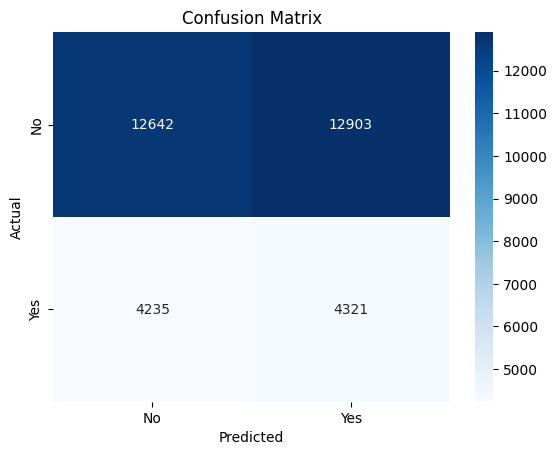

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()